In [1]:
%matplotlib inline

# This example show you how to train a classifier using pytorch framework:


## step
--------------------
0. check your device
1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function and optimizer
4. Train the network
5. Test the network on the test data
--------------------


In [7]:
import torch
import torchvision
import torchvision.transforms as transforms

########################################################################
## 0. check your device

In the beginning, you have to be sure you have your gpu device available.

    [Remark] if you want to utilize GPUs for computation, you should check your system supports to CUDA.
    (refer the following step)

    [Remark] Pytorch have two types of tensor, one is CPU tensor types, another is CUDA tensor types. 
    GPU only can use CUDA tensor types for computation. 

-[Official document]: https://pytorch.org/docs/stable/cuda.html
########################################################################

In [8]:
#To determine if your system supports CUDA
print("==> Check devices..")
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Current device: ",device)

#Also can print your current GPU id, and the number of GPUs you can use.
print("Our selected device: ", torch.cuda.current_device())
print(torch.cuda.device_count(), " GPUs is available")

==> Check devices..
Current device:  cuda
Our selected device:  0
1  GPUs is available


########################################################################
## 1. Load and normalizing the CIFAR10 training and test datasets using torchvision


1.1     Before building the dataset, knowing how to do data preprocessing is very important. Pytorch provides a package called "torchvision", it consists of some functions for image transformation, like: normalization, rotation, resize...etc., or if the provided functions didn't meet the needs, you can to use other libraries or tools to preprocess the data.
   

1.2     Pytorch provides a class called "dataset", you can create a subclass of it to format your raw data to a more suitable format for DataLoader. Fortunately, pytorch provided some popular datasets, model architectures, and functions of image transformation in "torchvision".


    [Remark] If you want to build a pytorch dataset for your own data. One you can do is rewriting a new subclass of original dataset class, and anothor is using the API called "ImageFolder" to load your dataset. The return of the "ImageFolder" is also a pytorch dataset class. However, you should adjust the directory architecture to match the need of "ImageFolder".

    [Remark] Study the document about "ImageFolder" is useful for your [LAB 1-2] 


1.3     After defining "Dataset" class, you can start to define a "DataLoader" class. You can easily to do "Minibatch training" by DataLoader. "Minibatch training" means DataLoader will separate your dataset into several batch. And each batch consists fixed number of data depend on what batch size you set.


-[How to load common dataset]: https://pytorch.org/docs/stable/torchvision/datasets.html

-[How to use ImageFolder]: https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#afterword-torchvision

-[torchvision document]: https://pytorch.org/docs/stable/torchvision/index.html

-[torchvision sourcecode]: https://github.com/pytorch/vision/tree/master/torchvision

-[Dataset, DataLoader, DataLoaderIter document]: https://pytorch.org/docs/stable/data.html

-[Dataset, DataLoader, DataLoaderIter sourcecode]: https://pytorch.org/docs/stable/_modules/torch/utils/data/dataset.html#Dataset

########################################################################

In [9]:
print('==> Preparing dataset..')

==> Preparing dataset..


In [10]:
"""1.1"""
# The output of torchvision datasets are PILImage images of range [0, 1]
# We transform them to Tensor type
# And normalize the data
# Be sure you do same normalization for your train and test data

#The transform function for train data
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

#The transform function for test data
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

In [11]:
"""1.2""" 

#Use API to load CIFAR10 train dataset
#trainset = torchvision.datasets.CIFAR10(root='/tmp/dataset-nctu', train=True, download=False, transform=transform_train)
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)

#Use API to load CIFAR10 test dataset
#testset = torchvision.datasets.CIFAR10(root='/tmp/dataset-nctu', train=False, download=False, transform=transform_test)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

#The "download" option must be False in this Lab
#The cifar10 dataset we will provide in this path: /tmp/dataset-nctu
#Dataset definition need to know your customized transform function

Files already downloaded and verified
Files already downloaded and verified


In [12]:
"""1.3"""

#Create DataLoader to draw samples from the dataset
#In this case, we define a DataLoader to random sample our dataset. 
#For single sampling, we take one batch of data. Each batch consists 4 images
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=32,
shuffle=False, num_workers=2)

In [13]:
#Because cifar10 number the data classes in range [0,10]
#However, number representation is unreadable for humans
#So, we manually set the name of each class
classes = ('plane', 'car', 'bird', 'cat',
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

########################################################################

# 2. Define a Convolution Neural Network
    
Neural networks can be constructed using the "torch.nn" package, "torch.nn" depends on "autograd" to define model. A complete model definition contains layers declaration and forwarding methods.

    
All the model in pytorch inherit the "nn.Module" class. You can define new layer via "torch.nn" library. And, concatenate these layers into a complete model.


-[How to use nn.Module] https://pytorch.org/docs/stable/nn.html#torch.nn.Module

########################################################################

In [14]:
print('==> Building model..')

==> Building model..


In [15]:
import torch.nn as nn

In [16]:
# define your own model
class Net(nn.Module):

    #define the layers
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.relu = nn.ReLU()
        
    #concatenate these layers
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [12]:
# declare a new model
tmp_net = Net()
# now, you can see current model architecture
print(tmp_net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (relu): ReLU()
)


In [13]:
# or take a look at one layer of model
print(tmp_net.conv1)

Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))


In [14]:
# you also can change the layer of model
# but can't edit the forward method
tmp_net.fc3 = nn.Linear(15,2)
print(tmp_net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=15, out_features=2, bias=True)
  (relu): ReLU()
)


In [15]:
# just edit the parameter of one layer is OK
tmp_net.fc3.out_features = 10
print(tmp_net)

# [Remark] above two method to change the layer
# architecture is important in [LAB 1-2]

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=15, out_features=10, bias=True)
  (relu): ReLU()
)


In [16]:
#declare a new model
net = Net()
# change all model tensor into cuda type
# something like weight & bias are the tensor 
if device == 'cuda':
    net = net.cuda(0)
else:
    net = net.cpu()

########################################################################

# 3. Define a Loss function and optimize

########################################################################

In [17]:
print('==> Defining loss function and optimize..')

==> Defining loss function and optimize..


In [20]:
import torch.optim as optim
from torch.optim import lr_scheduler

#loss function
criterion = nn.CrossEntropyLoss()
#optimization algorithm
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=25, gamma=0.1)

########################################################################

# 4. Train the network

Before training the model, we need to analysis the tensor variable.


Each variable have many attibute, like: .grad_fn, .require_grad, .data, .grad...etc. The ".grad_fn" attribute of "torch.Tensor" is an entry point into the function that has create this "torch.Tensor" variables. Because of ".grad_fn" flag, we can easily create a computing graph in the form of DAG(directed acyclic graph).

And then, the ".require_grad" attribute allows us to determine whether the backward propagation function is going to calculate the gradient of this "torch.Tensor" variable. If one variable has a false value of require_grad, it represent that you don't want to calculate this variable's gradient, and also its gradient will not be updated.

########################################################################

In [19]:
print('==> Training model..')

==> Training model..


In [20]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

def show_weight_distribution(epoch):
    n_bins = 50
    font_size = 8
    plt.rcParams.update({'axes.titlesize': font_size})
    plt.rcParams.update({'axes.labelsize': font_size})
    plt.rcParams.update({'xtick.labelsize': font_size})
    plt.rcParams.update({'ytick.labelsize': font_size})
    fig, axs = plt.subplots(1, 5, sharey=True)
    
    x = net.conv1.weight.view(-1,1).cpu().detach().numpy()
    plt.subplot(1, 5, 1)
    plt.hist(x, bins=n_bins)
    plt.xlabel('conv1')
    plt.title('Weight Distribution, epoch: %d' %(epoch))

    x = net.conv2.weight.view(-1,1).cpu().detach().numpy()
    plt.subplot(1, 5, 2)
    plt.hist(x, bins=n_bins)
    plt.xlabel('conv2')

    x = net.fc1.weight.view(-1,1).cpu().detach().numpy()
    plt.subplot(1, 5, 3)
    plt.hist(x, bins=n_bins)
    plt.xlabel('fc1')

    x = net.fc2.weight.view(-1,1).cpu().detach().numpy()
    plt.subplot(1, 5, 4)
    plt.hist(x, bins=n_bins)
    plt.xlabel('fc2')

    x = net.fc3.weight.view(-1,1).cpu().detach().numpy()
    plt.subplot(1, 5, 5)
    plt.hist(x, bins=n_bins)
    plt.xlabel('fc3')

    plt.show()

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

def show_bias_distribution(epoch):
    n_bins = 50
    font_size = 8
    plt.rcParams.update({'axes.titlesize': font_size})
    plt.rcParams.update({'axes.labelsize': font_size})
    plt.rcParams.update({'xtick.labelsize': font_size})
    plt.rcParams.update({'ytick.labelsize': font_size})
    fig, axs = plt.subplots(1, 5, sharey=True)
    
    x = net.conv1.bias.view(-1,1).cpu().detach().numpy()
    plt.subplot(1, 5, 1)
    plt.hist(x, bins=n_bins)
    plt.xlabel('conv1')
    plt.title('Bias Distribution, epoch: %d' %(epoch))

    x = net.conv2.bias.view(-1,1).cpu().detach().numpy()
    plt.subplot(1, 5, 2)
    plt.hist(x, bins=n_bins)
    plt.xlabel('conv2')

    x = net.fc1.bias.view(-1,1).cpu().detach().numpy()
    plt.subplot(1, 5, 3)
    plt.hist(x, bins=n_bins)
    plt.xlabel('fc1')

    x = net.fc2.bias.view(-1,1).cpu().detach().numpy()
    plt.subplot(1, 5, 4)
    plt.hist(x, bins=n_bins)
    plt.xlabel('fc2')

    x = net.fc3.bias.view(-1,1).cpu().detach().numpy()
    plt.subplot(1, 5, 5)
    plt.hist(x, bins=n_bins)
    plt.xlabel('fc3')

    plt.show()

1 epoch, training accuracy: 29.0000%, loss = 0.0599
2 epoch, training accuracy: 40.7660%, loss = 0.0502
3 epoch, training accuracy: 45.4260%, loss = 0.0465
4 epoch, training accuracy: 48.8840%, loss = 0.0440
5 epoch, training accuracy: 51.2800%, loss = 0.0421
6 epoch, training accuracy: 53.2060%, loss = 0.0408
7 epoch, training accuracy: 54.6480%, loss = 0.0395
8 epoch, training accuracy: 55.4940%, loss = 0.0387
9 epoch, training accuracy: 56.5380%, loss = 0.0378
10 epoch, training accuracy: 57.3940%, loss = 0.0373


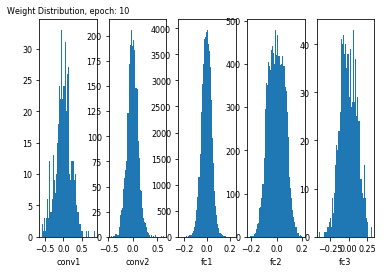

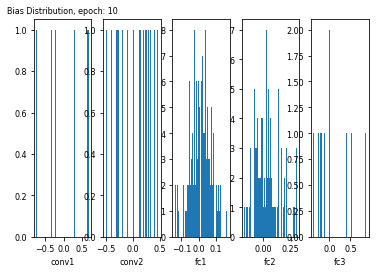

11 epoch, training accuracy: 58.3080%, loss = 0.0365
12 epoch, training accuracy: 58.7000%, loss = 0.0362
13 epoch, training accuracy: 59.4060%, loss = 0.0356
14 epoch, training accuracy: 59.9120%, loss = 0.0352
15 epoch, training accuracy: 60.6960%, loss = 0.0346
16 epoch, training accuracy: 60.9960%, loss = 0.0342
17 epoch, training accuracy: 61.6300%, loss = 0.0338
18 epoch, training accuracy: 61.9420%, loss = 0.0335
19 epoch, training accuracy: 62.5380%, loss = 0.0332
20 epoch, training accuracy: 62.8360%, loss = 0.0327


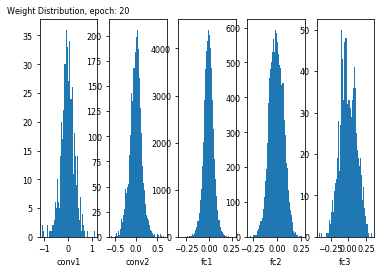

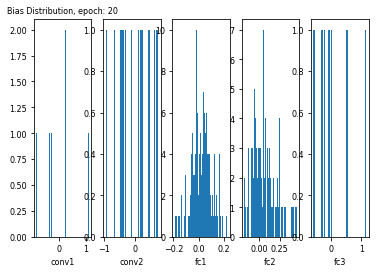

21 epoch, training accuracy: 62.9000%, loss = 0.0328
22 epoch, training accuracy: 63.1220%, loss = 0.0324
23 epoch, training accuracy: 63.5520%, loss = 0.0322
24 epoch, training accuracy: 63.8920%, loss = 0.0319
25 epoch, training accuracy: 63.8420%, loss = 0.0317
26 epoch, training accuracy: 66.9520%, loss = 0.0293
27 epoch, training accuracy: 67.6200%, loss = 0.0287
28 epoch, training accuracy: 67.8200%, loss = 0.0284
29 epoch, training accuracy: 67.9820%, loss = 0.0283
30 epoch, training accuracy: 67.9120%, loss = 0.0284


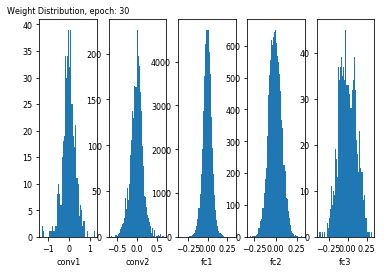

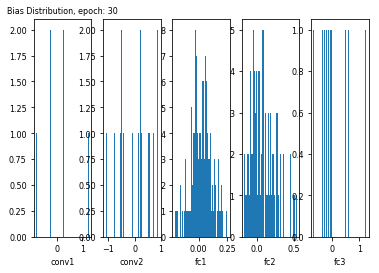

31 epoch, training accuracy: 68.2100%, loss = 0.0282
32 epoch, training accuracy: 68.5660%, loss = 0.0279
33 epoch, training accuracy: 68.4160%, loss = 0.0280
34 epoch, training accuracy: 68.6120%, loss = 0.0278
35 epoch, training accuracy: 68.5920%, loss = 0.0277
36 epoch, training accuracy: 68.8420%, loss = 0.0277
37 epoch, training accuracy: 68.7000%, loss = 0.0277
38 epoch, training accuracy: 68.7080%, loss = 0.0277
39 epoch, training accuracy: 68.8620%, loss = 0.0275
40 epoch, training accuracy: 68.8660%, loss = 0.0275


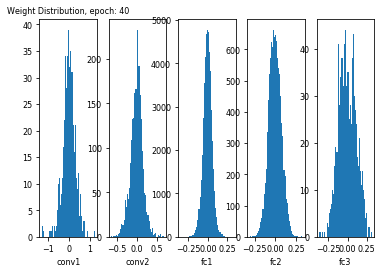

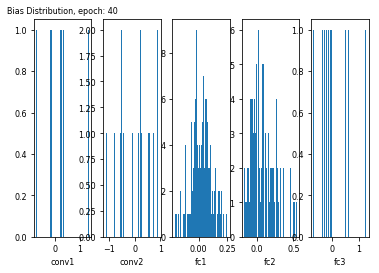

41 epoch, training accuracy: 68.9900%, loss = 0.0275
42 epoch, training accuracy: 69.0180%, loss = 0.0275
43 epoch, training accuracy: 69.0400%, loss = 0.0275
44 epoch, training accuracy: 69.0080%, loss = 0.0274
45 epoch, training accuracy: 68.8120%, loss = 0.0274
46 epoch, training accuracy: 68.8540%, loss = 0.0274
47 epoch, training accuracy: 69.3100%, loss = 0.0273
48 epoch, training accuracy: 69.4320%, loss = 0.0271
49 epoch, training accuracy: 69.3900%, loss = 0.0272
50 epoch, training accuracy: 69.2520%, loss = 0.0272


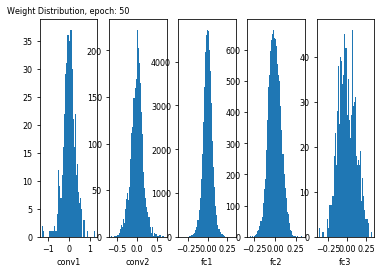

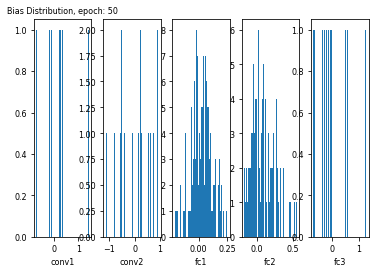

51 epoch, training accuracy: 69.7040%, loss = 0.0268
52 epoch, training accuracy: 69.6240%, loss = 0.0268
53 epoch, training accuracy: 69.8500%, loss = 0.0267
54 epoch, training accuracy: 69.8140%, loss = 0.0267
55 epoch, training accuracy: 69.6100%, loss = 0.0267
56 epoch, training accuracy: 69.5900%, loss = 0.0269
57 epoch, training accuracy: 69.9760%, loss = 0.0265
58 epoch, training accuracy: 69.8540%, loss = 0.0266
59 epoch, training accuracy: 69.6820%, loss = 0.0267
60 epoch, training accuracy: 69.9300%, loss = 0.0265


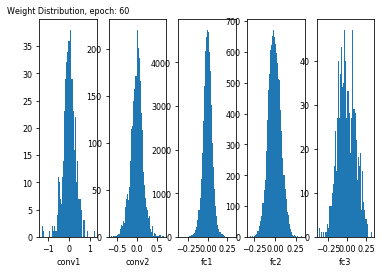

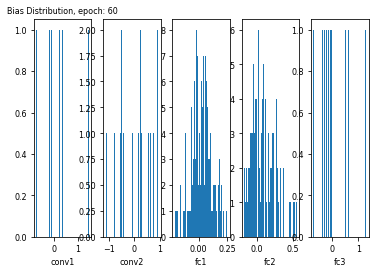

61 epoch, training accuracy: 69.7780%, loss = 0.0267
62 epoch, training accuracy: 69.9700%, loss = 0.0266
63 epoch, training accuracy: 69.9400%, loss = 0.0267
64 epoch, training accuracy: 69.7840%, loss = 0.0267
65 epoch, training accuracy: 69.9280%, loss = 0.0268
66 epoch, training accuracy: 69.8120%, loss = 0.0266
67 epoch, training accuracy: 69.7700%, loss = 0.0266
68 epoch, training accuracy: 69.9620%, loss = 0.0266
69 epoch, training accuracy: 69.8600%, loss = 0.0267
70 epoch, training accuracy: 69.9560%, loss = 0.0266


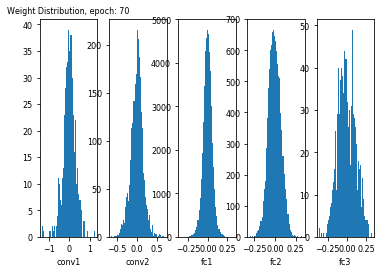

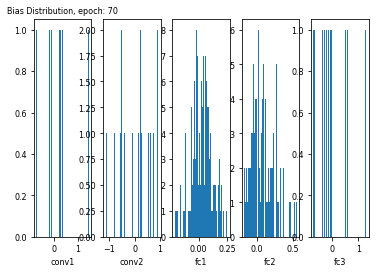

71 epoch, training accuracy: 69.7820%, loss = 0.0267
72 epoch, training accuracy: 69.8220%, loss = 0.0268
73 epoch, training accuracy: 70.1660%, loss = 0.0265
74 epoch, training accuracy: 69.8780%, loss = 0.0267
75 epoch, training accuracy: 69.6040%, loss = 0.0268
76 epoch, training accuracy: 70.1660%, loss = 0.0263
77 epoch, training accuracy: 69.9400%, loss = 0.0265
78 epoch, training accuracy: 70.0740%, loss = 0.0266
79 epoch, training accuracy: 70.0500%, loss = 0.0266
80 epoch, training accuracy: 69.9780%, loss = 0.0266


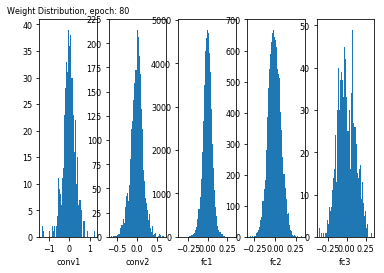

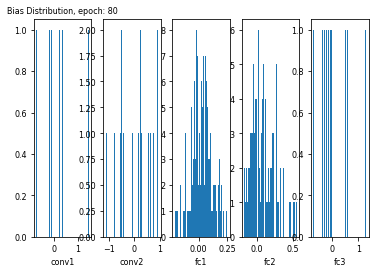

81 epoch, training accuracy: 70.2140%, loss = 0.0265
82 epoch, training accuracy: 69.9680%, loss = 0.0266
83 epoch, training accuracy: 70.0740%, loss = 0.0265
84 epoch, training accuracy: 70.0620%, loss = 0.0266
85 epoch, training accuracy: 70.1560%, loss = 0.0265
86 epoch, training accuracy: 70.1280%, loss = 0.0264
87 epoch, training accuracy: 70.1300%, loss = 0.0265
88 epoch, training accuracy: 69.9600%, loss = 0.0265
89 epoch, training accuracy: 69.9660%, loss = 0.0265
90 epoch, training accuracy: 69.9920%, loss = 0.0266


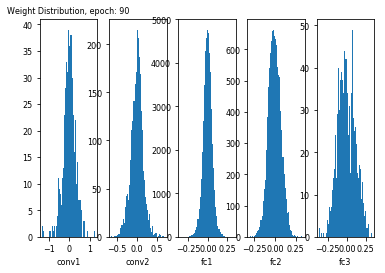

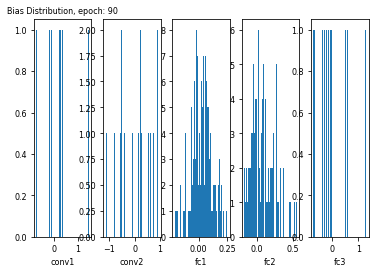

91 epoch, training accuracy: 69.7820%, loss = 0.0266
92 epoch, training accuracy: 70.1200%, loss = 0.0265
93 epoch, training accuracy: 70.0760%, loss = 0.0266
94 epoch, training accuracy: 70.2220%, loss = 0.0265
95 epoch, training accuracy: 69.9180%, loss = 0.0265
96 epoch, training accuracy: 70.2440%, loss = 0.0264
97 epoch, training accuracy: 69.8160%, loss = 0.0266
98 epoch, training accuracy: 69.8200%, loss = 0.0267
99 epoch, training accuracy: 69.6780%, loss = 0.0265
100 epoch, training accuracy: 70.1120%, loss = 0.0265


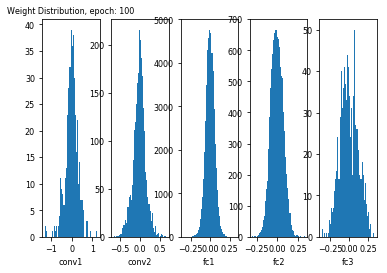

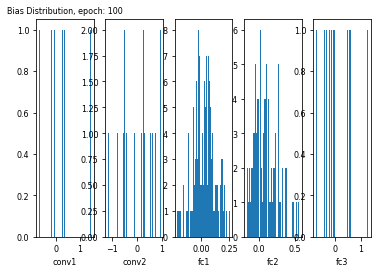

Finished Training


In [22]:
#Set the model in training mode
#because some function like: dropout, batchnorm...etc, will have 
#different behaviors in training/evaluation mode
#[document]: https://pytorch.org/docs/stable/nn.html#torch.nn.Module.train
net.train()

for epoch in range(100):  # loop over the dataset multiple times
    running_loss = 0.0
    correct = 0
    exp_lr_scheduler.step()
    for i, (inputs, labels) in enumerate(trainloader, 0):
                       
        #change the type into cuda tensor 
        inputs = inputs.cuda(0)
        labels = labels.cuda(0)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        # select the class with highest probability
        _, pred = outputs.max(1)
        # if the model predicts the same results as the true
        # label, then the correct counter will plus 1
        correct += pred.eq(labels).sum().item()
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('%d epoch, training accuracy: %.4f%%, loss = %.4f' %
          (epoch+1, 100.*correct/len(trainset), running_loss/len(trainset)))
    if((epoch % 10) == 9):
        show_weight_distribution(epoch+1)
        show_bias_distribution(epoch+1)
    
print('Finished Training')

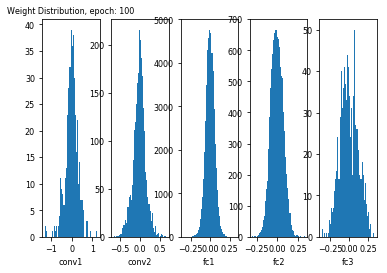

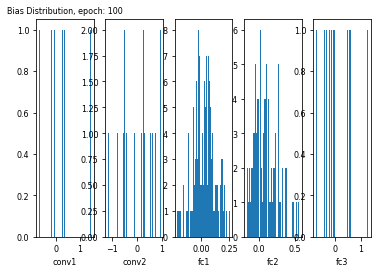

In [23]:
show_weight_distribution(100)
show_bias_distribution(100)

In [1]:
import os
import sys
import re
from collections import OrderedDict

def train_acc_loss_result(fname):

    dictionary_acc = OrderedDict()
    dictionary_loss = OrderedDict()
    
    with open(fname) as fp:  
        for cnt, line in enumerate(fp):
            # print("Line {}: {}".format(cnt, line))
            # 62 epoch, training accuracy: 67.6480%, loss = 0.0290
            pattern = re.compile(r"(\d+) epoch, training accuracy: (\d+.\d+)%, loss = (\d+.\d+)")
            match = pattern.match(line)
            if match:
                epoch_str, acc_str, loss_str = match.groups()
                print('Epoch: {:s}, acc: {:s}, loss: {:s}'.
                      format(epoch_str, acc_str, loss_str))

                Epoch = int(epoch_str)
                acc = float("{:f}".format(float(acc_str)))
                loss = float("{:f}".format(float(loss_str)))
                
                dictionary_acc[Epoch] = acc
                dictionary_loss[Epoch] = loss
                    
    return dictionary_acc, dictionary_loss

In [2]:
import matplotlib.pyplot as plt
import itertools

def show_train_acc(dictionary_acc, dictionary_loss):
    fig, ax1 = plt.subplots()

    fig.set_figheight(20)
    fig.set_figwidth(20)

    ax1.set_title('Training Accuracy & Loss', fontsize=20)

    ax2 = ax1.twinx()
    ax2.figure.figsize=(120,120)
    
    l1, = ax1.plot(list(dictionary_acc.keys()), list(dictionary_acc.values()), 'b-')
    l2, = ax2.plot(list(dictionary_loss.keys()), list(dictionary_loss.values()), 'r--')
    
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    ax1.tick_params(axis='both', which='major', labelsize=20)
    ax2.tick_params(axis='y', which='major', labelsize=20)

    ax1.set_xlabel('Epoch', fontsize=20)
    ax1.set_ylabel('Accuracy', fontsize=20, color='b')
    ax2.set_ylabel('Loss', fontsize=20, color='r')

    #ax1.set(ylim=[0, 100])
    #ax2.set(ylim=[0, 0.2])

    ax1.grid(axis='both', which='both')
    plt.legend(handles=[l1, l2],
               labels=['Accuracy', 'Loss'], fontsize=20, loc='right')

    plt.show()

In [3]:
fname = './lab1-1.log'
dictionary_acc, dictionary_loss = train_acc_loss_result(fname)

Epoch: 1, acc: 27.9700, loss: 0.0608
Epoch: 2, acc: 41.0600, loss: 0.0501
Epoch: 3, acc: 46.2240, loss: 0.0463
Epoch: 4, acc: 49.6220, loss: 0.0437
Epoch: 5, acc: 51.9280, loss: 0.0419
Epoch: 6, acc: 53.7980, loss: 0.0404
Epoch: 7, acc: 55.6440, loss: 0.0390
Epoch: 8, acc: 57.0800, loss: 0.0379
Epoch: 9, acc: 57.9560, loss: 0.0372
Epoch: 10, acc: 58.7820, loss: 0.0364
Epoch: 11, acc: 59.2940, loss: 0.0359
Epoch: 12, acc: 60.1160, loss: 0.0352
Epoch: 13, acc: 60.4500, loss: 0.0348
Epoch: 14, acc: 61.3300, loss: 0.0342
Epoch: 15, acc: 61.6220, loss: 0.0340
Epoch: 16, acc: 62.3340, loss: 0.0334
Epoch: 17, acc: 62.4420, loss: 0.0332
Epoch: 18, acc: 63.1360, loss: 0.0328
Epoch: 19, acc: 63.1680, loss: 0.0325
Epoch: 20, acc: 63.3420, loss: 0.0324
Epoch: 21, acc: 63.8080, loss: 0.0320
Epoch: 22, acc: 64.1420, loss: 0.0318
Epoch: 23, acc: 64.5120, loss: 0.0315
Epoch: 24, acc: 64.7740, loss: 0.0313
Epoch: 25, acc: 65.1480, loss: 0.0312
Epoch: 26, acc: 67.6340, loss: 0.0288
Epoch: 27, acc: 68.45

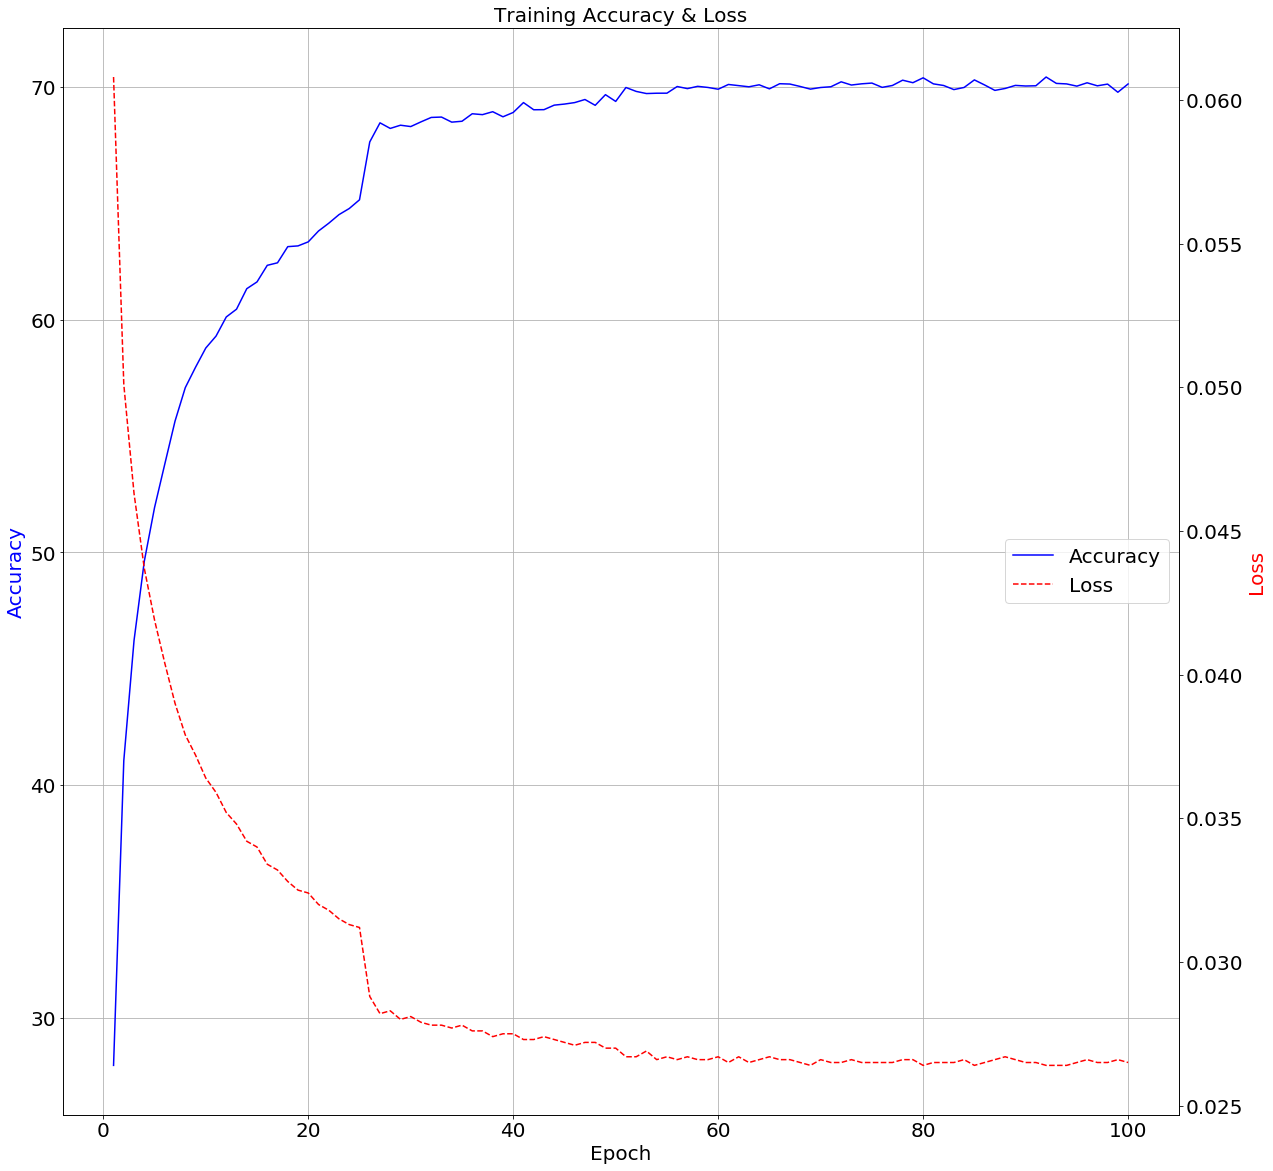

In [4]:
show_train_acc(dictionary_acc, dictionary_loss)

In [22]:
#After training , save the model first
#You can saves only the model parameters or entire model
#Some difference between the two is that entire model 
#not only include parameters but also record hwo each 
#layer is connected(forward method).
#[document]: https://pytorch.org/docs/master/notes/serialization.html

print('==> Saving model..')

#only save model parameters
torch.save(net.state_dict(), './lab1-1_checkpoint.t7')
#you also can store some log information
state = {
    'net': net.state_dict(),
    'acc': 100.*correct/len(trainset),
    'epoch': 75
}
torch.save(state, './lab1-1_checkpoint.t7')

#save entire model
torch.save(net, './lab1-1_model.pt')

print('Finished Saving')

==> Saving model..
Finished Saving


/root/anaconda3/lib/python3.7/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


########################################################################

# 5. Test the network on the test data

########################################################################

In [23]:
#Before testing, we can load the saved model
#Depend on how you save your model, need 
#different way to use it

print('==> Loading model..')

#If you just save the model parameters, you
#need to redefine the model architecture, and
#load the parameters into your model
net = Net()
checkpoint = torch.load('./lab1-1_checkpoint.t7')
net.load_state_dict(checkpoint['net'])

#If you save the entire model
net = torch.load('./lab1-1_model.pt')

print('Finished Loading')

==> Loading model..
Finished Loading


In [24]:
print('==> Testing model..')

#Set the model in evaluation mode
#[document]: https://pytorch.org/docs/stable/nn.html#torch.nn.Module.eval 
net.eval()


==> Testing model..


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (relu): ReLU()
)

In [25]:
######################
#######LAB 1-1########
"""
To Do Here

        You should complete the testing step in LAB 1-1
You should show the total accuracy & loss [10000 cifar10 test cases]
  You also need to tell us, how about the accuracy for each class
 
    For example: Total accuracy is: 60.0% and loss is: 0.02  
                 For each class in cifar 10:
                 Accuracy of plane : 58.0%
                 Accuracy of   car : 22.4%
                            .
                            .
                            .
"""
######################
correct = 0
total = 0
running_loss = 0.0

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data

        if device == 'cuda':
            images = images.cuda(0)
            labels = labels.cuda(0)
        else:
            images = images.cpu()
            labels = labels.cpu()
        
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        loss = criterion(outputs, labels)
        running_loss += loss.item()

        c = (predicted == labels).squeeze()
        #print(predicted)
        #print(labels.size(0))
        #print(c)
        for i in range(labels.size(0)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

print('Accuracy of the network on the %d test images: %.2f%%, and loss is: %.3f'
      % (total, 100 * correct / total, running_loss / total))

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of the network on the 10000 test images: 70.25%, and loss is: 0.026
Accuracy of plane : 76 %
Accuracy of   car : 83 %
Accuracy of  bird : 55 %
Accuracy of   cat : 50 %
Accuracy of  deer : 64 %
Accuracy of   dog : 60 %
Accuracy of  frog : 78 %
Accuracy of horse : 73 %
Accuracy of  ship : 81 %
Accuracy of truck : 78 %
